In [1]:
import os
os.chdir('C:/Users/Rohit/Anaconda3/Food cost')

In [106]:
import xlrd
import csv

def csv_from_excel():
    wb = xlrd.open_workbook('Data_Train.xlsx')
    sh = wb.sheet_by_name('Sheet1')
    your_csv_file = open('food_train.csv', 'w')
    wr = csv.writer(your_csv_file, quoting=csv.QUOTE_ALL)

    wb1 = xlrd.open_workbook('Data_Test.xlsx')
    sh1 = wb1.sheet_by_name('Sheet1')
    your_csv_file1 = open('food_test.csv', 'w')
    wr1 = csv.writer(your_csv_file1, quoting=csv.QUOTE_ALL)

    for rownum in range(sh.nrows):
        wr.writerow(sh.row_values(rownum))

    for rownum1 in range(sh1.nrows):
        wr1.writerow(sh1.row_values(rownum1))

    your_csv_file.close()
    your_csv_file1.close()

# runs the csv_from_excel function:
csv_from_excel()

In [107]:
import numpy as py
import pandas as pd
food_train = pd.read_csv('food_train.csv',encoding = "ISO-8859-1")
food_test = pd.read_csv('food_test.csv',encoding = "ISO-8859-1")


,Total,Percent
VOTES,1204,0.094878
CITY,112,0.008826
LOCALITY,98,0.007723
RATING,2,0.000158
COST,0,0.000000


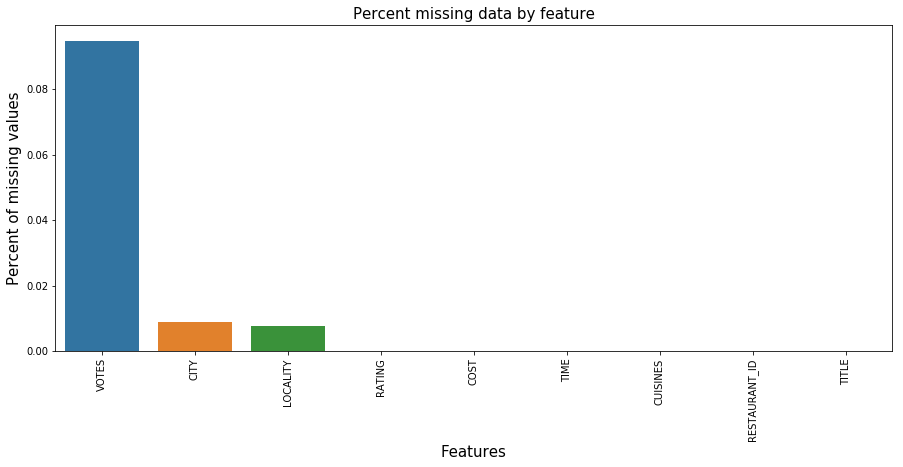

In [108]:
#Finding percentage of missing values in train set
import seaborn as sns
import matplotlib.pyplot as plt
total = food_train.isnull().sum().sort_values(ascending=False)
percent = (food_train.isnull().sum()/food_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
missing_data.head()

,Total,Percent
VOTES,402,0.095013
CITY,35,0.008272
LOCALITY,30,0.007091
RATING,2,0.000473
TIME,0,0.000000


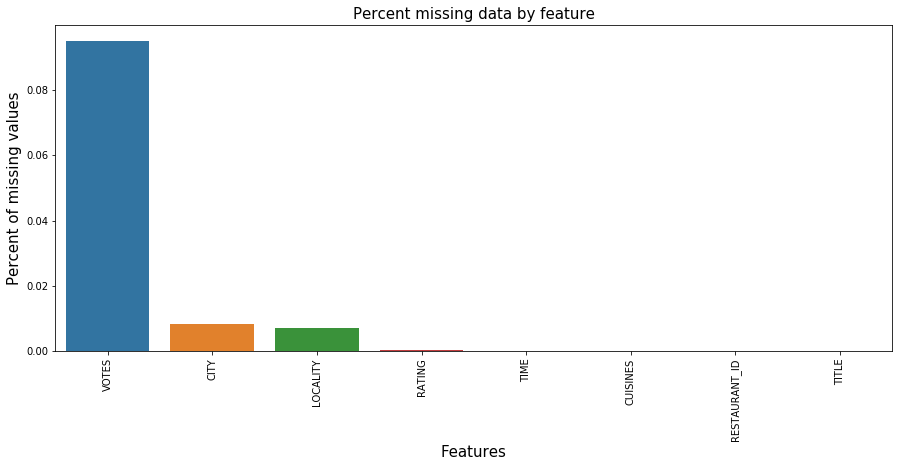

In [109]:
#Finding percentage of missing values in test set
total = food_test.isnull().sum().sort_values(ascending=False)
percent = (food_test.isnull().sum()/food_test.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
missing_data.head()

In [110]:
#Removing NaN rows
food_train = food_train[pd.notnull(food_train['CITY'])]
food_train = food_train[pd.notnull(food_train['LOCALITY'])]
food_train = food_train[pd.notnull(food_train['RATING'])]
food_train = food_train[pd.notnull(food_train['VOTES'])]

food_test = food_test[pd.notnull(food_test['CITY'])]
food_test = food_test[pd.notnull(food_test['LOCALITY'])]
food_test = food_test[pd.notnull(food_test['RATING'])]
food_test = food_test[pd.notnull(food_test['VOTES'])]

In [111]:
food_train['TITLE'].replace("None","GENERAL")
food_test['TITLE'].replace("None","GENERAL")

0                    CASUAL DINING
1                      QUICK BITES
2                    CASUAL DINING
3                          GENERAL
4                      QUICK BITES
5        FOOD TRUCK,DESSERT PARLOR
7                    CASUAL DINING
8                          GENERAL
9                    CASUAL DINING
10      DESSERT PARLOR,QUICK BITES
11                     QUICK BITES
12               CASUAL DINING,BAR
13                          LOUNGE
14                   CASUAL DINING
15                   CASUAL DINING
16                     QUICK BITES
17                         GENERAL
18                     QUICK BITES
19                   BEVERAGE SHOP
20                   CASUAL DINING
22               CASUAL DINING,PUB
23                     QUICK BITES
25                  DESSERT PARLOR
26                   CASUAL DINING
28                   CASUAL DINING
30                     QUICK BITES
31                             PUB
32                   CASUAL DINING
33                  

In [112]:
food_train = food_train.drop(['TIME'],axis = 1)
food_train = food_train.drop(['RESTAURANT_ID'],axis = 1)
food_train = food_train.drop(['LOCALITY'],axis = 1)

food_test = food_test.drop(['TIME'],axis = 1)
food_test = food_test.drop(['RESTAURANT_ID'],axis = 1)
food_test = food_test.drop(['LOCALITY'],axis = 1)

In [113]:
new_votes = food_train.VOTES.str.extract('(\d+)')
food_train['VOTES'] = new_votes

new_votes1 = food_test.VOTES.str.extract('(\d+)')
food_test['VOTES'] = new_votes1

In [114]:
dummies = pd.get_dummies(food_train['CUISINES'].str.split(',').apply(pd.Series)).rename(columns=lambda x: 'CUISINES_' + str(x))
dummies = pd.DataFrame(dummies)
food_train = pd.concat([food_train, dummies],axis=1)

#dummies = pd.get_dummies(food_train.TITLE.str.split(',')).rename(columns=lambda x: 'TITLE_' + str(x))
#food_train = pd.concat([food_train, dummies], axis=1)

In [115]:
dummies = pd.get_dummies(food_train['TITLE'].str.split(',').apply(pd.Series)).rename(columns=lambda x: 'TITLE_' + str(x))
dummies = pd.DataFrame(dummies)
food_train = pd.concat([food_train, dummies],axis=1)


In [116]:
dummies = pd.get_dummies(food_train['CITY'].str.split(',').apply(pd.Series)).rename(columns=lambda x: 'CITY_' + str(x))
dummies = pd.DataFrame(dummies)
food_train = pd.concat([food_train, dummies],axis=1)

In [117]:
dummies = pd.get_dummies(food_test['CUISINES'].str.split(',').apply(pd.Series)).rename(columns=lambda x: 'CUISINES_' + str(x))
dummies = pd.DataFrame(dummies)
food_test = pd.concat([food_test, dummies],axis=1)

dummies = pd.get_dummies(food_test['TITLE'].str.split(',').apply(pd.Series)).rename(columns=lambda x: 'TITLE_' + str(x))
dummies = pd.DataFrame(dummies)
food_test = pd.concat([food_test, dummies],axis=1)

dummies = pd.get_dummies(food_test['CITY'].str.split(',').apply(pd.Series)).rename(columns=lambda x: 'CITY_' + str(x))
dummies = pd.DataFrame(dummies)
food_test = pd.concat([food_test, dummies],axis=1)


In [118]:
food_train = food_train.drop(['CUISINES'],axis = 1)
food_train = food_train.drop(['TITLE'],axis = 1)
food_train = food_train.drop(['CITY'],axis = 1)

food_test = food_test.drop(['CUISINES'],axis = 1)
food_test = food_test.drop(['TITLE'],axis = 1)
food_test = food_test.drop(['CITY'],axis = 1)

In [119]:
food_train.reset_index(drop=True,inplace = True)
food_test.reset_index(drop=True,inplace = True)

In [172]:
food_train.head()

,RATING,VOTES,CUISINES_African,CUISINES_American,CUISINES_Andhra,CUISINES_Arabian,CUISINES_Asian,CUISINES_Assamese,CUISINES_Awadhi,CUISINES_BBQ,...,CITY_Secunderabad,CITY_Secunderabad.,CITY_Serilingampally,CITY_Telangana,CITY_Thane,CITY_ThaneWest,CITY_Tripunithura,CITY_Velachery,CITY_kochi,COST
0,3.6,-0.435256,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1200.0
1,4.2,-0.457729,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1500.0
2,3.8,-0.231820,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,800.0
3,4.1,-0.464825,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,800.0
4,3.8,-0.298055,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,300.0


In [169]:
food_test.head()

,RATING,VOTES,CUISINES_African,CUISINES_American,CUISINES_Andhra,CUISINES_Arabian,CUISINES_Asian,CUISINES_Assamese,CUISINES_Awadhi,CUISINES_BBQ,...,CITY_Powai,CITY_Secunderabad,CITY_Secunderabad.,CITY_Serilingampally,CITY_Telangana,CITY_Thane,CITY_ThaneWest,CITY_Tripunithura,CITY_Velachery,CITY_kochi
0,4.3,0.159015,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4.2,-0.443943,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3.8,-0.097512,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3.8,1.215092,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3.6,-0.489495,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [122]:
food_train.columns=food_train.columns.str.replace('\d+\_', '').str.replace(' ','')
food_test.columns=food_test.columns.str.replace('\d+\_', '').str.replace(' ','')

In [145]:
len(list(food_train))

485

In [136]:
len(list(food_test))

276

Removing duplicate columns

In [125]:
food_train = food_train.loc[:,~food_train.columns.duplicated()]
food_test = food_test.loc[:,~food_test.columns.duplicated()]

In [128]:
food_train.to_csv('C:/Users/Rohit/Anaconda3/Food cost/food_train1.csv')
food_test.to_csv('C:/Users/Rohit/Anaconda3/Food cost/food_test1.csv')

Finding out the columns which are common in both training and test data set

In [160]:
common_cols = list((food_train.columns).intersection(food_test.columns))

In [161]:
len(common_cols)

186

In [162]:
common_cols

['RATING',
 'VOTES',
 'CUISINES_African',
 'CUISINES_American',
 'CUISINES_Andhra',
 'CUISINES_Arabian',
 'CUISINES_Asian',
 'CUISINES_Assamese',
 'CUISINES_Awadhi',
 'CUISINES_BBQ',
 'CUISINES_Bakery',
 'CUISINES_BarFood',
 'CUISINES_Bengali',
 'CUISINES_Beverages',
 'CUISINES_Bihari',
 'CUISINES_Biryani',
 'CUISINES_British',
 'CUISINES_BubbleTea',
 'CUISINES_Burger',
 'CUISINES_Burmese',
 'CUISINES_Cafe',
 'CUISINES_CafeFood',
 'CUISINES_Chettinad',
 'CUISINES_Chinese',
 'CUISINES_Coffee',
 'CUISINES_Continental',
 'CUISINES_Desserts',
 'CUISINES_DrinksOnly',
 'CUISINES_European',
 'CUISINES_FastFood',
 'CUISINES_FingerFood',
 'CUISINES_French',
 'CUISINES_German',
 'CUISINES_Goan',
 'CUISINES_Gujarati',
 'CUISINES_HealthyFood',
 'CUISINES_Hyderabadi',
 'CUISINES_IceCream',
 'CUISINES_Indian',
 'CUISINES_Indonesian',
 'CUISINES_Iranian',
 'CUISINES_Italian',
 'CUISINES_Japanese',
 'CUISINES_Juices',
 'CUISINES_Kashmiri',
 'CUISINES_Kebab',
 'CUISINES_Kerala',
 'CUISINES_Konkan',
 'C

In [144]:
#food_train = new_food

Considering only the common columns

In [163]:
food_train = food_train[common_cols]

In [165]:
food_test = food_test[common_cols]

In [166]:
from sklearn import preprocessing

def norm(column):
    return preprocessing.scale(column)

food_train['VOTES'] = norm(food_train['VOTES'])
#food_train['RATING'] = norm(food_train['RATING'])

D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [167]:
food_test['VOTES'] = norm(food_test['VOTES'])

D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [171]:
food_train['COST'] = new_food['COST']

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


# Performing Linear regression

In [173]:
from sklearn.linear_model import LinearRegression
feature_cols = food_train.loc[:, food_train.columns != 'COST']

In [174]:
model = LinearRegression()
prediction = model.fit(feature_cols,food_train['COST'])

Calculating the R - squared value

In [175]:
r_sq = model.score(feature_cols, food_train['COST'])
print(r_sq)

0.708798780012372


In [176]:
train_pred = model.predict(feature_cols)

In [177]:
linear_pred = pd.DataFrame(train_pred)

In [179]:
linear_pred

,0
0,680.548626
1,1132.961846
2,764.322460
3,435.029128
4,370.564939
5,907.238259
6,684.838521
7,1549.688707
8,278.656668
9,354.916250


Calculating RMSE

In [178]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(food_train['COST'], linear_pred))
print(rmse)

349.09452779007097


In [180]:
pd.DataFrame(zip(feature_cols.columns,model.coef_),columns = ['features','Coefficients'])

,features,Coefficients
0,RATING,113.916900
1,VOTES,30.388842
2,CUISINES_African,-18.935617
3,CUISINES_American,46.305924
4,CUISINES_Andhra,-185.923536
5,CUISINES_Arabian,-230.930700
6,CUISINES_Asian,184.222200
7,CUISINES_Assamese,-264.465537
8,CUISINES_Awadhi,22.482590
9,CUISINES_BBQ,-29.943748


In [186]:
new_food = food_train


In [181]:
pred_linear = model.predict(food_test)
pred_linear

array([938.71886943, 394.49365299, 876.71110783, ..., 388.74643398,
       604.48541602, 701.88240447])

In [182]:
pred_linear = pd.DataFrame(pred_linear, columns = ['COST'])
pred_linear.to_csv('C:/Users/Rohit/Anaconda3/Food cost/Linear_Predictions.csv')

In [187]:
from xlsxwriter.workbook import Workbook
import glob
for csvfile in glob.glob(os.path.join('C:/Users/Rohit/Anaconda3/Food cost/Linear_Predictions.csv')):
    workbook = Workbook(csvfile[:-4] + '.xlsx')
    worksheet = workbook.add_worksheet()
    with open(csvfile, 'rt', encoding='utf8') as f:
        reader = csv.reader(f)
        for r, row in enumerate(reader):
            for c, col in enumerate(row):
                worksheet.write(r, c, col)
    workbook.close()

# Performing Ridge Regression